In [ ]:
import os
import numpy as np
# 读取训练集、测试集
X_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\X_train.npy")
X_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\X_test.npy")
Y_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\y_train.npy")
Y_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\y_test.npy")
ids_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\ids_test.npy")
ids_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\sr_train.npy")
sr_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\sr_train.npy")
sr_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\sr_test.npy")

In [2]:
#X_train
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import cv2  # 用于调整图像尺寸
from tqdm import tqdm

# 读取数据
X_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\X_train.npy")
X_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\X_test.npy")
Y_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\y_train.npy")
Y_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\y_test.npy")
ids_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\ids_train.npy")
ids_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\ids_test.npy")
sr_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\sr_train.npy")  # 训练集采样率
sr_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\sr_test.npy")  # 测试集采样率

# 设定参数
target_size = (128, 128)  # CNN 适配的目标尺寸
num_samples = X_train.shape[0]
dd_features = np.zeros((num_samples, target_size[0], target_size[1]), dtype=np.uint8)  # (样本数, 128, 128)

# 计算模糊函数（Delay-Doppler 变换）
def ambiguity_function(input_signal, sample_rate, win_len=256, hop_size=128):
    f, t, Zxx = sig.stft(input_signal, fs=sample_rate, nperseg=win_len, noverlap=hop_size)
    AF = np.abs(np.fft.fftshift(np.fft.ifft2(np.abs(Zxx) ** 2)))
    return AF

# 计算 Delay-Doppler 并处理 (使用 tqdm 进度条)
for i, (sig_sample, sample_rate) in enumerate(tqdm(zip(X_train, sr_train), total=num_samples, desc="Processing Delay-Doppler", unit="sample")):
    # 归一化到 [-1, 1]
    sig_sample = sig_sample.astype(np.float32)
    sig_sample = sig_sample / np.max(np.abs(sig_sample))

    # 计算 Delay-Doppler 变换（模糊函数）
    dd_spectrum = ambiguity_function(sig_sample, sample_rate)

    # 归一化到 [0,255]（增强稳定性）
    if np.max(dd_spectrum) - np.min(dd_spectrum) > 0:
        dd_spectrum = (dd_spectrum - np.min(dd_spectrum)) / (np.max(dd_spectrum) - np.min(dd_spectrum))
    else:
        dd_spectrum = np.zeros_like(dd_spectrum)  # 防止除零错误
    
    dd_resized = cv2.resize((dd_spectrum * 255).astype(np.uint8), target_size, interpolation=cv2.INTER_CUBIC)
    dd_features[i] = dd_resized

# **整理成 CNN 输入格式 (num_samples, 128, 128, 1)**
dd_features = np.expand_dims(dd_features, axis=-1)

# 保存转换后的特征
output_path = r"D:\Dataset\Temp_Results\DelayDoppler\X_train_dd_cnn.npy"
np.save(output_path, dd_features)

print(f"✅ Delay-Doppler 计算完成！CNN 适配特征已保存至 {output_path}")


Processing Delay-Doppler: 100%|██████████| 468/468 [00:01<00:00, 284.79sample/s]

✅ Delay-Doppler 计算完成！CNN 适配特征已保存至 D:\Dataset\Temp_Results\DelayDoppler\X_train_dd_cnn.npy


In [3]:
#X_test
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import cv2  # 用于调整图像尺寸
from tqdm import tqdm

# 读取数据
X_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\X_train.npy")
X_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\X_test.npy")
Y_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\y_train.npy")
Y_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\y_test.npy")
ids_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\ids_train.npy")
ids_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\ids_test.npy")
sr_train = np.load(r"D:\Dataset\Temp_Results\Train_Test\sr_train.npy")  # 训练集采样率
sr_test = np.load(r"D:\Dataset\Temp_Results\Train_Test\sr_test.npy")  # 测试集采样率

# 设定参数
target_size = (128, 128)  # CNN 适配的目标尺寸
num_samples = X_test.shape[0]
dd_features = np.zeros((num_samples, target_size[0], target_size[1]), dtype=np.uint8)  # (样本数, 128, 128)

# 计算模糊函数（Delay-Doppler 变换）
def ambiguity_function(input_signal, sample_rate, win_len=256, hop_size=128):
    f, t, Zxx = sig.stft(input_signal, fs=sample_rate, nperseg=win_len, noverlap=hop_size)
    AF = np.abs(np.fft.fftshift(np.fft.ifft2(np.abs(Zxx) ** 2)))
    return AF

# 计算 Delay-Doppler 并处理 (使用 tqdm 进度条)
for i, (sig_sample, sample_rate) in enumerate(tqdm(zip(X_test, sr_test), total=num_samples, desc="Processing Delay-Doppler", unit="sample")):
    # 归一化到 [-1, 1]
    sig_sample = sig_sample.astype(np.float32)
    sig_sample = sig_sample / np.max(np.abs(sig_sample))

    # 计算 Delay-Doppler 变换（模糊函数）
    dd_spectrum = ambiguity_function(sig_sample, sample_rate)

    # 归一化到 [0,255]（增强稳定性）
    if np.max(dd_spectrum) - np.min(dd_spectrum) > 0:
        dd_spectrum = (dd_spectrum - np.min(dd_spectrum)) / (np.max(dd_spectrum) - np.min(dd_spectrum))
    else:
        dd_spectrum = np.zeros_like(dd_spectrum)  # 防止除零错误
    
    dd_resized = cv2.resize((dd_spectrum * 255).astype(np.uint8), target_size, interpolation=cv2.INTER_CUBIC)
    dd_features[i] = dd_resized

# **整理成 CNN 输入格式 (num_samples, 128, 128, 1)**
dd_features = np.expand_dims(dd_features, axis=-1)

# 保存转换后的特征
output_path = r"D:\Dataset\Temp_Results\DelayDoppler\X_test_dd_cnn.npy"
np.save(output_path, dd_features)

print(f"✅ Delay-Doppler 计算完成！CNN 适配特征已保存至 {output_path}")


Processing Delay-Doppler: 100%|██████████| 117/117 [00:00<00:00, 272.35sample/s]

✅ Delay-Doppler 计算完成！CNN 适配特征已保存至 D:\Dataset\Temp_Results\DelayDoppler\X_test_dd_cnn.npy


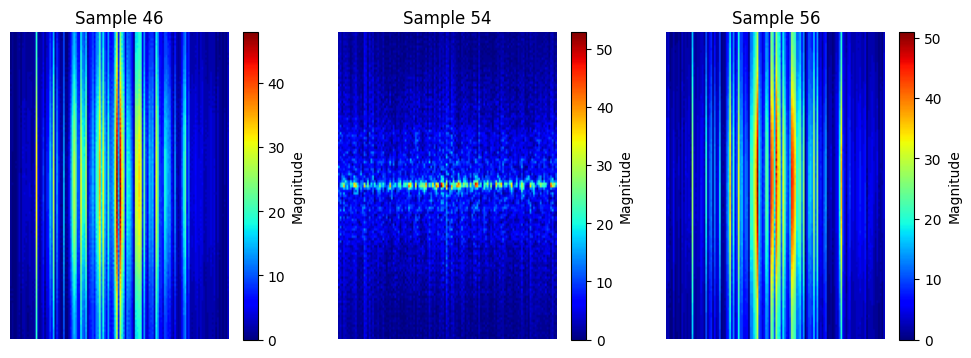

In [11]:
import random
import matplotlib.pyplot as plt

# 随机选择 3 个样本索引
random_indices = random.sample(range(num_samples), 3)

# **绘制随机选择的 3 张小波变换图像**
plt.figure(figsize=(12, 4))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 3, i + 1)
    plt.imshow(dd_features[idx], cmap='jet', aspect='auto')
    plt.colorbar(label="Magnitude")
    plt.title(f"Sample {idx}")
    plt.axis("off")  # 关闭坐标轴
plt.show()